## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 98](#Problem-98)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).

## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 98 <a name="Problem-98"></a>

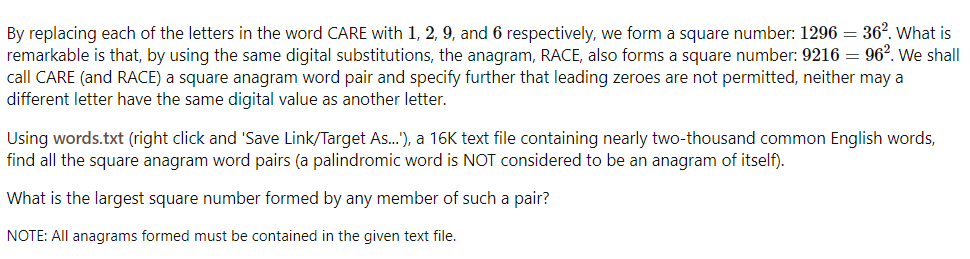

<br>
$**Hint**$

Brute Force

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time
from itertools import permutations #permutaions of numbers
from collections import defaultdict

## Main Solution <a name="Main-Solution"></a>

First we read the file and specify the possible anagrams

In [ ]:
with open("098_words.txt","r") as file:
    content = file.read().strip('"')
    words = content.replace('"', '').split(',')

d = defaultdict(list)

for i in words:
    a = ''.join(sorted(str(i)))
    d[a].append(i)

d = {key: value for key, value in d.items() if len(value)> 1}

pairs = set()
for i in d:
    if len(d[i])==2:
        pairs.add(tuple(d[i]))
    else:
        pairs.add(tuple([d[i][0],d[i][1]]))
        pairs.add(tuple([d[i][0],d[i][2]]))
        pairs.add(tuple([d[i][1],d[i][2]]))

Now we tackle the problem

In [ ]:
start_time = time.time()

answer = 0
for word1 , word2 in pairs:
    x = list(set(word1))
    d = {x[i]:i for i in range(len(x))}

    for y in permutations('0123456789', len(x)):
        if y[d[word1[0]]] != '0' and y[d[word2[0]]] != '0':

            a = int(''.join(y[d[i]] for i in word1))

            if int(a**0.5)**2 == a:

                b = int(''.join(y[d[i]] for i in word2))

                if int(b**0.5)**2 == b:
                    answer = max(answer, a, b)

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 18769 
Execution time: 18.0398 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

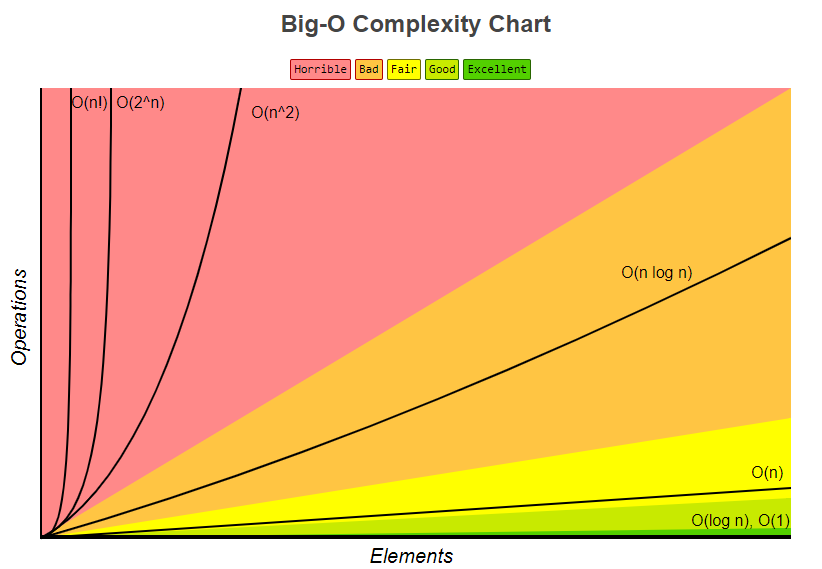

The time and space complexity of my code can be analyzed as follows:

Time Complexity:
1. Reading the file and processing the words: The code reads the contents of the file and processes the words by sorting and appending them to the defaultdict. This step takes $O(N * M * log (M))$ time, where $N$ is the number of words and $M$ is the maximum length of a word.

2. Creating the pairs set: The code iterates over the defaultdict and creates pairs of words. If there are more than two words with the same sorted characters, it generates all possible pairs using permutations. This step takes $O(N * P)$ time, where $N$ is the number of words and $P$ is the number of pairs generated.

3. Finding the maximum valid numbers: For each pair of words, the code generates permutations of digits and checks if the resulting numbers satisfy the conditions. The number of permutations is based on the number of distinct characters in the pair. This step takes $O(P * D!)$, where $P$ is the number of pairs and $D$ is the number of distinct characters.

Overall, the **time complexity** of the code can be approximated as $O(N * M * log (M) + N * P * D!)$, where $N$ is the number of words, $M$ is the maximum length of a word, $P$ is the number of pairs, and $D$ is the number of distinct characters in a pair.

Space Complexity:
1. defaultdict and pairs set: The code uses a defaultdict to store the words grouped by their sorted characters, and a set to store the pairs of words. The space complexity for these data structures is proportional to the number of words and pairs, respectively. Therefore, the space complexity is $O(N + P)$.

2. Temporary variables: The code uses temporary variables to store intermediate results during the computation, such as sorted characters, distinct characters, and dictionaries. The space used by these variables is relatively small and does not depend on the input size. Hence, the space complexity is considered negligible.

In summary, the **space complexity** of the code is $O(N + P)$, where N is the number of words and P is the number of pairs.